In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
@jit(nopython=True)
def pure_aloha(lamb, p):

    intervals = np.random.exponential(1/lamb, 10000)
    #intervals = np.array(intervals)
    intervals = np.cumsum(intervals)
    limit = intervals[-1] + 1
    current_str = -1
    current_end = 0
    success = 0
    timestamps = []
    backlog = []
    succ_list = []

    while current_end < limit:

        count = 0
        current_str = intervals.min()
        current_end = current_str + 1

        for z in range(len(intervals)):
            temp = intervals[z]
            if (temp <= current_end):
                count += 1
            if temp > current_end:
                break
        
        if count == 1:
            intervals[0] = np.inf
            success += 1

        if count >1:
            for z in range(len(intervals)):
                temp = intervals[z]
                if (temp <= current_end):
                    current_end = intervals[z] + 1
                    intervals[z] = current_end + random.expovariate(p)
                if temp > current_end:
                    break

        succ_list.append(success)
        timestamps.append(current_str)
        backlog.append(count)

        intervals.sort()

    return success/current_end, timestamps, backlog, succ_list

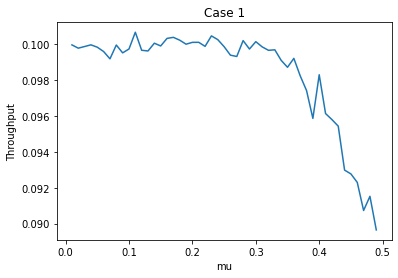

In [3]:
#Case 1
results = []
a = np.arange(0.01, 0.5, 0.01)

for z in np.arange(0.01, 0.5, 0.01):
    #print(z)
    test=0
    for _ in range(10):
        cum, timest, backl, succ_ = pure_aloha(0.1, z)
        test += cum
    results.append(test/10)

plt.plot(a, results)
plt.xlabel("mu")
plt.ylabel("Throughput")
plt.title("Case 1")
plt.show()

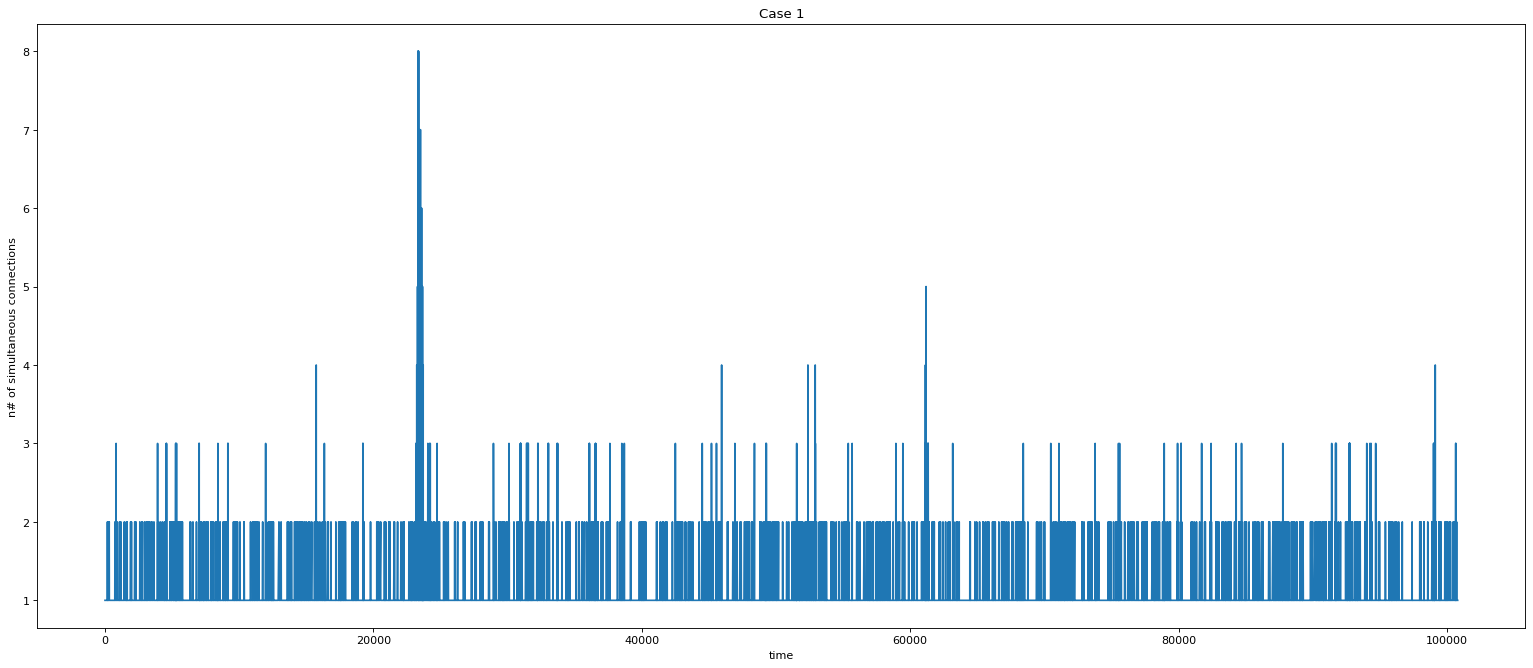

In [4]:
cum, timest, backl, succ_ = pure_aloha(0.1, (max(range(len(results)), key=results.__getitem__)*0.01) + 0.01)

plt.figure(figsize=(24, 10), dpi=80)
plt.plot(timest, backl)
plt.xlabel("time")
plt.ylabel("n# of simultaneous connections")
plt.title("Case 1")
plt.show()

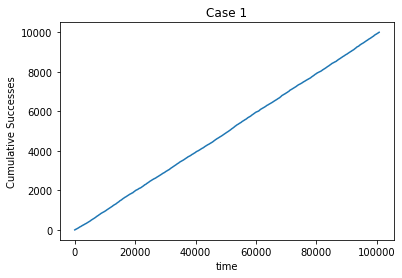

In [5]:
plt.plot(timest, succ_)
plt.xlabel("time")
plt.ylabel("Cumulative Successes")
plt.title("Case 1")
plt.show()

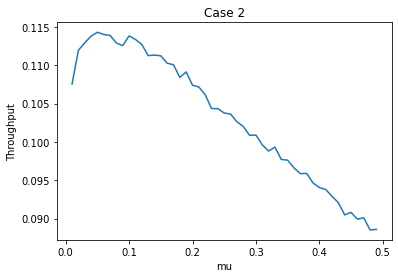

In [6]:
#Case 2
results = []
a = np.arange(0.01, 0.5, 0.01)

for z in np.arange(0.01, 0.5, 0.01):
    #print(z)
    test=0
    for _ in range(10):
        cum, timest, backl, succ_ = pure_aloha(0.2, z)
        test += cum
    results.append(test/10)

plt.plot(a, results)
plt.xlabel("mu")
plt.ylabel("Throughput")
plt.title("Case 2")
plt.show()

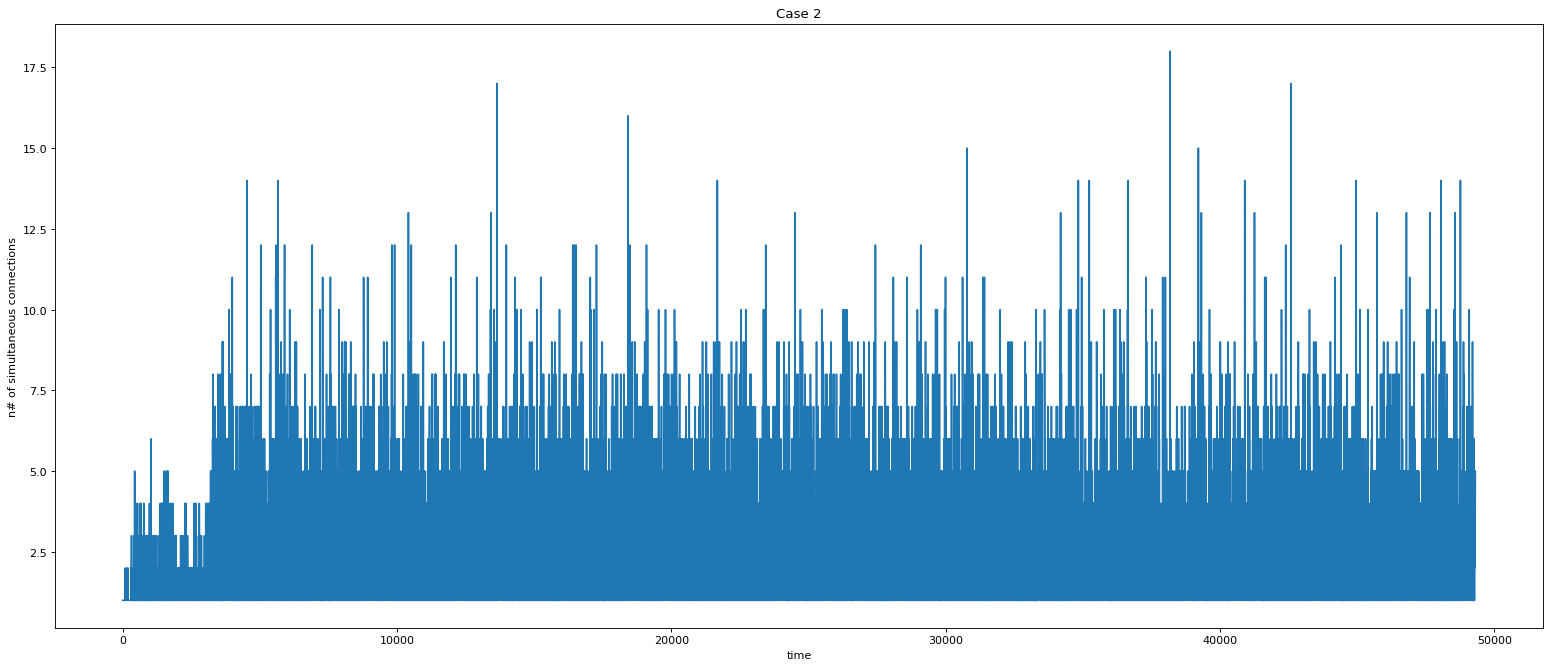

In [7]:
cum, timest, backl, succ_ = pure_aloha(0.2, (max(range(len(results)), key=results.__getitem__)*0.01) + 0.01)

plt.figure(figsize=(24, 10), dpi=80)
plt.plot(timest, backl)
plt.xlabel("time")
plt.ylabel("n# of simultaneous connections")
plt.title("Case 2")
plt.show()

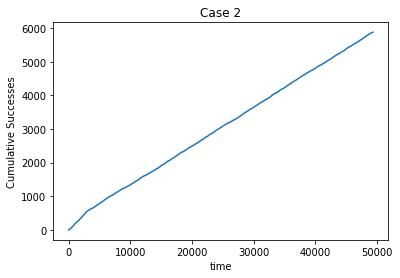

In [8]:
plt.plot(timest, succ_)
plt.xlabel("time")
plt.ylabel("Cumulative Successes")
plt.title("Case 2")
plt.show()

In [9]:
newp = (max(range(len(results)), key=results.__getitem__)*0.01) + 0.01

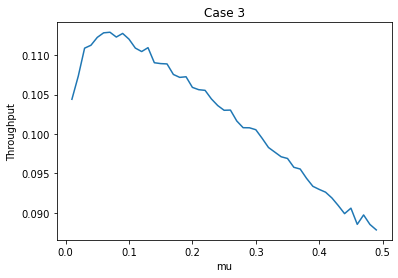

In [10]:
#Case 3
results = []
a = np.arange(0.01, 0.5, 0.01)

for z in np.arange(0.01, 0.5, 0.01):
    #print(z)
    test=0
    for _ in range(10):
        cum, timest, backl, succ_ = pure_aloha(0.3, z)
        test += cum
    results.append(test/10)

plt.plot(a, results)
plt.xlabel("mu")
plt.ylabel("Throughput")
plt.title("Case 3")
plt.show()

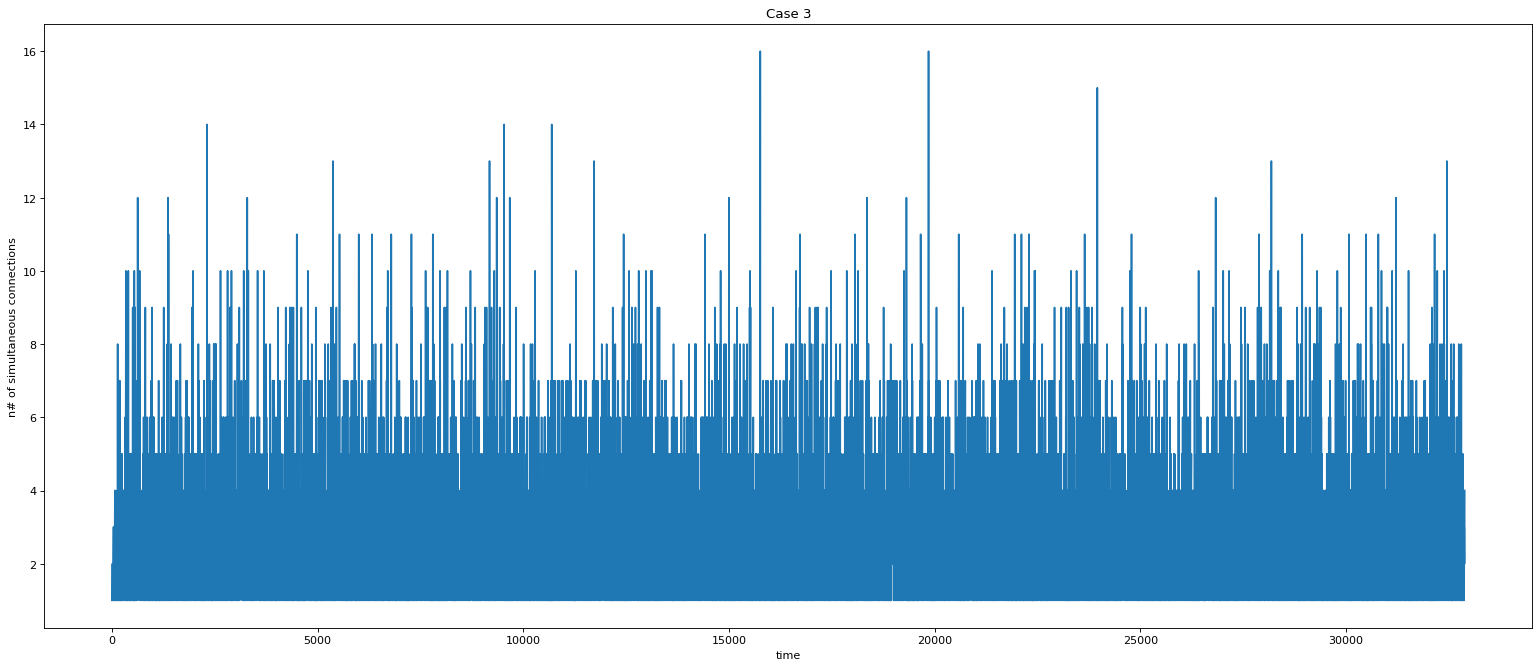

In [11]:
cum, timest, backl, succ_ = pure_aloha(0.3, (max(range(len(results)), key=results.__getitem__)*0.01) + 0.01)

plt.figure(figsize=(24, 10), dpi=80)
plt.plot(timest, backl)
plt.xlabel("time")
plt.ylabel("n# of simultaneous connections")
plt.title("Case 3")
plt.show()

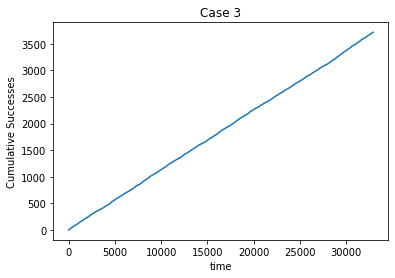

In [12]:
plt.plot(timest, succ_)
plt.xlabel("time")
plt.ylabel("Cumulative Successes")
plt.title("Case 3")
plt.show()

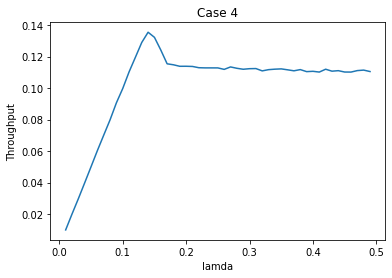

In [13]:
#Case 4
results = []
a = np.arange(0.01, 0.5, 0.01)

for z in np.arange(0.01, 0.5, 0.01):
    #print(z)
    test=0
    for _ in range(10):
        cum, timest, backl, succ_ = pure_aloha(z, newp)
        test += cum
    results.append(test/10)

plt.plot(a, results)
plt.xlabel("lamda")
plt.ylabel("Throughput")
plt.title("Case 4")
plt.show()

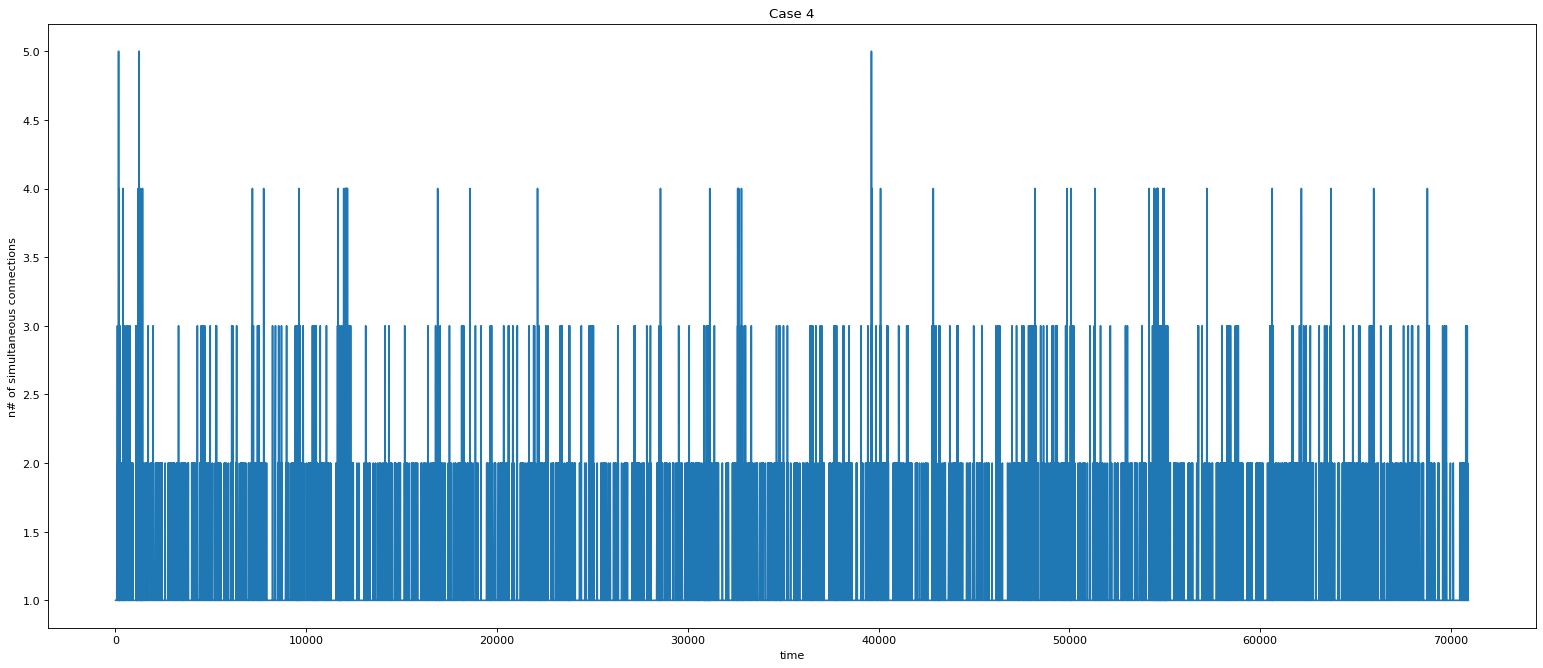

In [14]:
cum, timest, backl, succ_ = pure_aloha((max(range(len(results)), key=results.__getitem__)*0.01) + 0.01, newp)

plt.figure(figsize=(24, 10), dpi=80)
plt.plot(timest, backl)
plt.xlabel("time")
plt.ylabel("n# of simultaneous connections")
plt.title("Case 4")
plt.show()

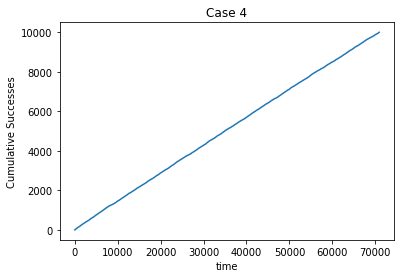

In [15]:
plt.plot(timest, succ_)
plt.xlabel("time")
plt.ylabel("Cumulative Successes")
plt.title("Case 4")
plt.show()